### Unsupervised Learning Approach: Clustering

As part of the exploratory analysis, I applied **unsupervised machine learning** to uncover hidden patterns and structure within the clinical dataset, independent of the heart attack labels.

#### Chosen Method: K-Means Clustering

Among the clustering methods studied (K-Means, Mean Shift, Hierarchical), **K-Means** was selected as the most appropriate for this project, for the following reasons:

- It is effective at identifying **natural groupings** in numerical clinical data (e.g., Troponin, CK-MB, blood pressure).
- It allows for **clear interpretation** of cluster centroids and feature importance.
- It is computationally efficient and **easy to visualize**, especially after dimensionality reduction (e.g., with PCA).
- It enables a comparison between **unsupervised clusters and the actual heart attack outcome** (`Result`) — helping validate if the clinical measurements align with real diagnoses.

#### How it supports the project goals

| Research Question | How Clustering Helps |
|-------------------|----------------------|
| What indicators are linked to heart attack? | Cluster centers highlight which features (e.g., Troponin) are elevated. |
| Patterns across demographics? | Clusters may reveal separation by age or gender. |
| Can we classify risk categories? | If clusters align with heart attack outcomes, they can serve as early risk identifiers. |
| What trends can be visualized? | Cluster plots (2D/3D) offer clear visualizations for clinical use. |

#### Future comparison

While K-Means was used first due to its simplicity and interpretability, other clustering methods like **Mean Shift** or **Hierarchical Clustering** can also be explored to capture more complex patterns or flexible cluster shapes.

In [159]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA

In [160]:
dataset = '../data/cleaned_Medicaldataset.csv.csv'
df = pd.read_csv(dataset, header=0)

#### Step 1: Select Relevant Numerical Features for Clustering

In [161]:
features = ['Age', 'Heart rate', 'Systolic blood pressure',
            'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

X = df[features].values  # Convert to NumPy array for KMeans

#### Step 2: Scale the Features (Standardization)

In [162]:
# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Use X from Step 1

# Optional: check the result
pd.DataFrame(X_scaled, columns=features).describe().round(2)


,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,788.00,788.00,788.00,788.00,788.00,788.00,788.00
mean,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.52,-2.81,-2.58,-2.53,-1.99,-1.30,-0.61
25%,-0.77,-0.86,-0.67,-0.81,-0.71,-0.70,-0.52
50%,0.03,-0.07,-0.07,-0.06,-0.40,-0.29,-0.37
75%,0.76,0.65,0.74,0.68,0.46,0.45,0.02
max,2.58,2.96,2.87,2.48,3.07,4.10,5.17


#### Step 3: Apply K-Means Clustering + Determine Optimal K

In [163]:
distortions = []
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X_scaled)
    distortion = np.mean(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1))
    distortions.append(distortion)

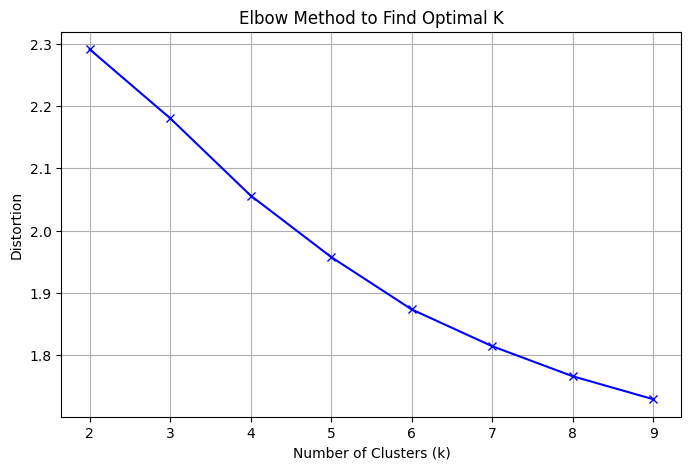

In [164]:
# Plot elbow
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method to Find Optimal K')
plt.grid(True)
plt.show()

#### Step 4: Silhouette Score (to confirm best k)

In [165]:
silhouette_scores = []
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X_scaled)
    score = silhouette_score(X_scaled, model.labels_)
    print(f"k = {k} | Silhouette Score: {score:.4f}")
    silhouette_scores.append(score)

k = 2 | Silhouette Score: 0.1525
k = 3 | Silhouette Score: 0.1669
k = 4 | Silhouette Score: 0.1701
k = 5 | Silhouette Score: 0.1770
k = 6 | Silhouette Score: 0.1627
k = 7 | Silhouette Score: 0.1585
k = 8 | Silhouette Score: 0.1542
k = 9 | Silhouette Score: 0.1457


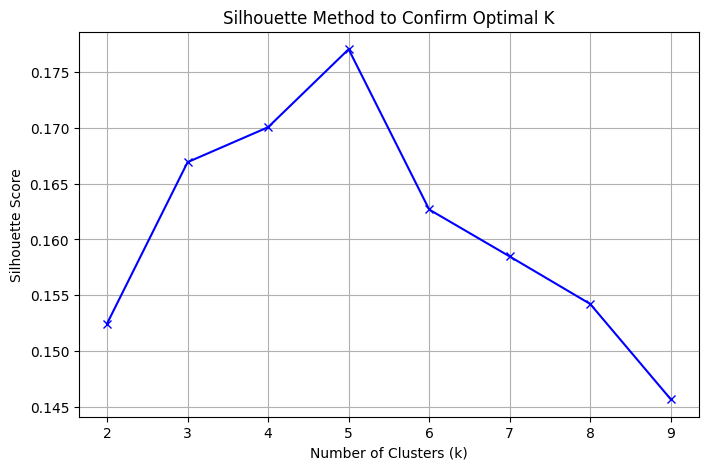

In [166]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method to Confirm Optimal K')
plt.grid(True)
plt.show()

#### Step 5: Fit Final K-Means Model

In [167]:
# Fit the final KMeans model
kmeans_final = KMeans(n_clusters=5, init='k-means++', n_init=20, random_state=42)
kmeans_final.fit(X_scaled)

# Predict cluster labels
cluster_labels = kmeans_final.predict(X_scaled)

# Optional: add labels back to original DataFrame for analysis
df['Cluster'] = cluster_labels


#### Step 6: Visualize Clusters vs. Actual Labels

In [168]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Map binary labels to numeric for comparison
df['Result_binary'] = df['Result'].map({'negative': 0, 'positive': 1})

Text(0, 0.5, 'PCA 2')

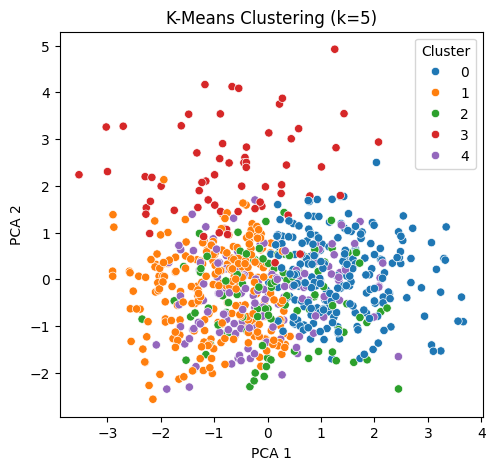

In [169]:
# Plot: Clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('K-Means Clustering (k=5)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

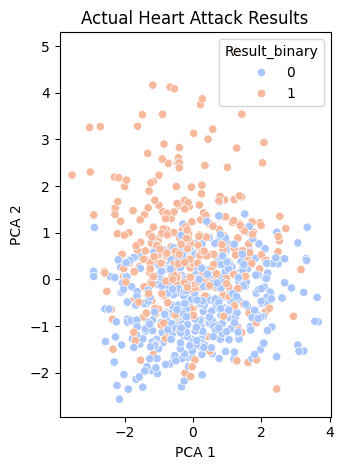

In [170]:
# Plot: Actual Heart Attack Labels
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Result_binary', palette='coolwarm')
plt.title('Actual Heart Attack Results')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()

Cluster 0: (216, 2)


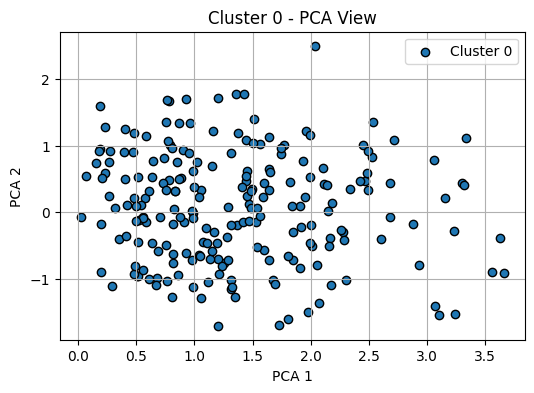

Cluster 1: (272, 2)


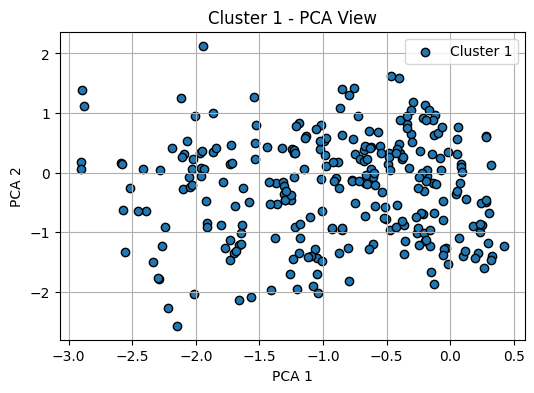

Cluster 2: (99, 2)


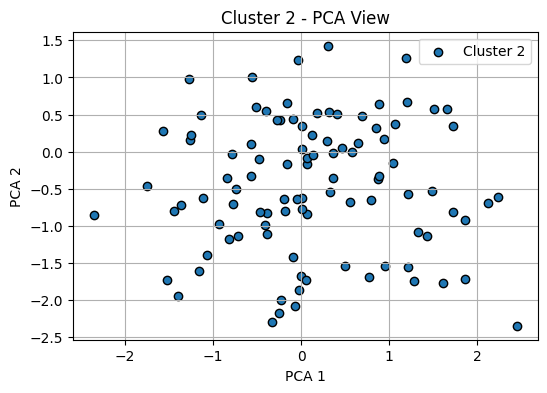

Cluster 3: (65, 2)


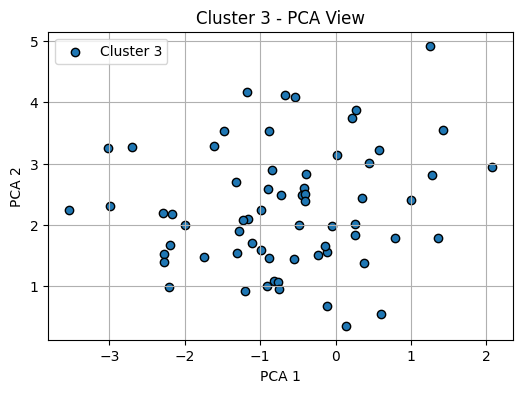

Cluster 4: (136, 2)


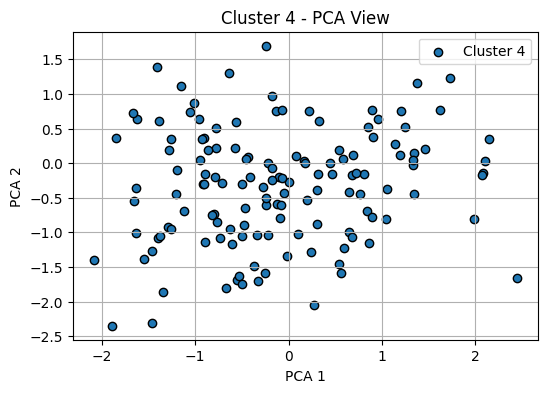

In [176]:
cluster_labels = kmeans_final.predict(X_scaled)
y_kmeans = cluster_labels
num_clusters = 5

for i in range(num_clusters):
    cluster = X_pca[y_kmeans == i]
    print(f"Cluster {i}: {cluster.shape}")
    plt.figure(figsize=(6, 4))
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}', edgecolors='k')
    plt.title(f'Cluster {i} - PCA View')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.legend()
    plt.show()
